In [256]:

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import pickle
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
import numba as nb
from numba import njit
from operator import itemgetter
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from matplotlib import animation


In [257]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

In [258]:
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1\\')
PATH = os.getcwd()
SAVE_PATH = 'C:\\Users\\Seth Sullivan\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Modeling Figures\\Optimal Stopping Expected Reward Figures Group\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Figures_Pull_List_Control.txt", "r") as pull_file:
    analysis_pull_list_control = pull_file.read().splitlines()
with open(PATH+"\\Figures_Pull_List_Task.txt", "r") as pull_file:
    analysis_pull_list_task = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
NUM_SUBJECTS = len(figures_pull_list)
task_name = 'Seth_MatchPennies_Agent_Exp1'

## Pickle

Pickle Load Control Tasks


In [259]:
coincidence_trials = 50
reaction_trials = 50
interval_trials = 50
# ---------------Controls-------------------------
player_reaction_decision_array = np.empty((NUM_SUBJECTS, reaction_trials))
agent_reaction_decision_array = np.empty((NUM_SUBJECTS, reaction_trials))
player_reaction_time = np.zeros([NUM_SUBJECTS,reaction_trials])*np.nan 
player_reaction_movement_time = np.zeros([NUM_SUBJECTS,reaction_trials])*np.nan
reaction_trial_start = np.zeros((NUM_SUBJECTS,reaction_trials))*np.nan 
coincidence_trial_start = np.zeros((NUM_SUBJECTS, coincidence_trials))*np.nan
coincidence_reach_time = np.zeros((NUM_SUBJECTS, coincidence_trials))*np.nan
interval_trial_start = np.zeros((NUM_SUBJECTS, interval_trials))*np.nan
interval_reach_time = np.zeros((NUM_SUBJECTS, interval_trials))*np.nan

for i in range(NUM_SUBJECTS):
    subname = figures_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    reaction_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_reaction_trial_start.pkl', 'rb'))
    player_reaction_time[i,:] = pickle.load(open(data_path + f'{subname}_player_reaction_time.pkl', 'rb'))
    player_reaction_movement_time[i,:] = pickle.load(open(data_path + f'{subname}_player_reaction_movement_time.pkl', 'rb'))
    player_reaction_decision_array[i,:] = pickle.load(open(data_path + f'{subname}_player_reaction_decision_array.pkl', 'rb'))
    agent_reaction_decision_array[i,:] = pickle.load(open(data_path + f'{subname}_agent_reaction_decision_time.pkl', 'rb'))
    reaction_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_reaction_trial_start.pkl', 'rb'))
    interval_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_interval_trial_start.pkl', 'rb'))
    interval_reach_time[i,:] = pickle.load(open(data_path + f'{subname}_interval_reach_time.pkl', 'rb'))
    coincidence_trial_start[i,:] = pickle.load(open(data_path + f'{subname}_coincidence_trial_start.pkl', 'rb'))
    coincidence_reach_time[i,:] =  pickle.load(open(data_path + f'{subname}_coincidence_reach_time.pkl', 'rb'))

Pickle Load Task and Washout

In [260]:
path1 = PATH+'\\'+'Sub1_Task'
task_df = pd.read_csv(path1+f'\\Sub1_TaskTrial_Table.csv')
task_df = task_df.loc[task_df['Condition type']==3] # Only get the task condition 
num_trials = int(task_df.iloc[-1]['Block_Step']) # number of trials in each block
num_blocks = int(task_df.iloc[-1]['Block_Row']/2)
tot_trials = int(num_trials*num_blocks)
trial_time = int(task_df.iloc[0]['Condition time'])
task_df_columns = len(fields_pull)
trial_table = np.empty((NUM_SUBJECTS, tot_trials, 4), int)
#----------------- TASK--------------------------------
player_task_reach_time = np.zeros([NUM_SUBJECTS,num_blocks,num_trials])*np.nan 
player_task_decision_time = np.zeros([NUM_SUBJECTS,num_blocks,num_trials])*np.nan 
player_task_decision_array = np.zeros([NUM_SUBJECTS,num_blocks,num_trials])*np.nan
player_task_movement_time = np.zeros([NUM_SUBJECTS,num_blocks,num_trials])*np.nan
agent_task_reach_time = np.zeros([NUM_SUBJECTS,num_blocks,num_trials])*np.nan 
agent_task_decision_time = np.zeros([NUM_SUBJECTS,num_blocks,num_trials])*np.nan 
agent_task_decision_array = np.zeros([NUM_SUBJECTS,num_blocks,num_trials])*np.nan

# -------------- Washout-------------------
washout_trials = 25
player_washout_reach_time = np.zeros([NUM_SUBJECTS,num_blocks,washout_trials])*np.nan 
player_washout_decision_time = np.zeros([NUM_SUBJECTS,num_blocks,washout_trials])*np.nan 
player_washout_decision_array = np.zeros([NUM_SUBJECTS,num_blocks,washout_trials])*np.nan
player_washout_movement_time = np.zeros([NUM_SUBJECTS,num_blocks,washout_trials])*np.nan
agent_washout_reach_time = np.zeros([NUM_SUBJECTS,num_blocks,washout_trials])*np.nan 
agent_washout_decision_time = np.zeros([NUM_SUBJECTS,num_blocks,washout_trials])*np.nan 
agent_washout_decision_array = np.zeros([NUM_SUBJECTS,num_blocks,washout_trials])*np.nan
agent_washout_movement_time = np.zeros([NUM_SUBJECTS,num_blocks,washout_trials])*np.nan

for i in range(NUM_SUBJECTS):
    subname = figures_pull_list[i]
    data_path = PATH+f'\\Subjects_Analyzed\\{subname}\\'
    #task_data[i,:,:,:,:] = pickle.load(open(data_path + f'{subname}_task_data.pkl', 'rb'))
    player_task_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_task_decision_time.pkl', 'rb'))
    player_task_decision_array[i,:,:] = pickle.load( open(data_path + f'{subname}_player_task_decision_array.pkl', 'rb'))
    player_task_movement_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_task_movement_time.pkl', 'rb'))
    player_task_reach_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_task_reach_time.pkl', 'rb'))
    agent_task_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_agent_task_decision_time.pkl', 'rb'))
    agent_task_decision_array[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_task_decision_array.pkl', 'rb'))
    agent_task_reach_time[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_task_reach_time.pkl', 'rb'))
    player_washout_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_decision_time.pkl', 'rb'))
    player_washout_decision_array[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_decision_array.pkl', 'rb'))
    player_washout_movement_time[i,:,:] = pickle.load(open(data_path + f'{subname}_player_washout_movement_time.pkl', 'rb'))
    player_washout_reach_time[i,:,:] = pickle.load( open(data_path + f'{subname}_player_washout_reach_time.pkl', 'rb'))
    agent_washout_decision_time[i,:,:] = pickle.load( open(data_path + f'{subname}_agent_washout_decision_time.pkl', 'rb'))
    agent_washout_decision_array[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_washout_decision_array.pkl', 'rb'))
    agent_washout_reach_time[i,:,:] = pickle.load(open(data_path + f'{subname}_agent_washout_reach_time.pkl', 'rb'))

## Calculations

#### Calculations (Control)

Reaction and Reaction Movement Time

In [261]:
#%% Calculate RT means and sds
player_reaction_time = np.where(player_reaction_time<200,np.nan,player_reaction_time) # Anytime someone reacted under 200 ms, replace with nan
reaction_plus_movement_time = player_reaction_time + player_reaction_movement_time
reaction_plus_movement_time_mean = np.nanmean(reaction_plus_movement_time, axis = 1)
reaction_plus_movement_time_sd = np.nanstd(reaction_plus_movement_time,axis=1)
player_reaction_movement_time_mean = np.nanmean(player_reaction_movement_time[:,10:], axis = 1)
player_reaction_movement_time_sd = np.nanstd(player_reaction_movement_time[:,10:], axis = 1)
player_reaction_time_mean = np.nanmean(player_reaction_time[:,10:], axis = 1)
player_reaction_time_median = np.nanmedian(player_reaction_time[:,10:], axis = 1)
player_reaction_time_sd = np.nanstd(player_reaction_time[:,10:], axis = 1)


In [262]:
player_reaction_movement_time_mean + player_reaction_time_mean

array([414.575, 424.35 , 454.   , 579.975, 420.725, 436.775, 475.075])

Coincidence Timing

In [263]:
coincidence_reach_time_mean = np.nanmean(coincidence_reach_time[:,10:], axis=1)
coincidence_reach_time_sd =  np.nanstd(coincidence_reach_time[:,10:], axis=1)

Interval Timing

In [264]:
interval_reach_time_mean = np.nanmean(interval_reach_time[:,10:], axis=1)
interval_reach_time_sd =  np.nanstd(interval_reach_time[:,10:], axis=1)

### Calculations (TASK)

Indecisions, Wins, Incorrects

In [265]:
# Win, Loss, Indecision counts
agent_task_decision_array = np.where(agent_task_decision_array == 2,-1,agent_task_decision_array) # Make sure agent_task_decision_array replaces 2 with -1 from the first pilot
player_indecisions = np.zeros((NUM_SUBJECTS, num_blocks))
player_wins = np.zeros((NUM_SUBJECTS, num_blocks))
player_incorrects = np.zeros((NUM_SUBJECTS,num_blocks))
for i in range(NUM_SUBJECTS):
    for j in range(num_blocks):
        player_indecisions[i,j] = np.count_nonzero(player_task_decision_array[i,j,:] == 0)
        player_wins[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == 1 , agent_task_decision_array[i,j,:] == 1))
        player_wins[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == -1 , agent_task_decision_array[i,j,:] == -1))
        player_wins[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == -1 , agent_task_decision_array[i,j,:] == 0))
        player_wins[i,j]+= np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == 1 , agent_task_decision_array[i,j,:] == 0))
        player_incorrects[i,j] = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == 1 , agent_task_decision_array[i,j,:] == -1))
        player_incorrects[i,j] += np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:] == -1 , agent_task_decision_array[i,j,:] == 1))
perc_player_indecisions = (player_indecisions / num_trials)*100
perc_player_wins = (player_wins / num_trials)*100
perc_player_incorrects = (player_incorrects/num_trials)*100

Experiment reach and decision times

In [266]:
# Actual trials
agent_mean_task_reach_time = np.nanmean(agent_task_reach_time,axis = 2)
agent_median_reach_time = np.nanmedian(agent_task_reach_time,axis = 2)
agent_sd_task_reach_time = np.nanstd(agent_task_reach_time,axis = 2)
agent_mean_decision_time = np.nanmean(agent_task_decision_time, axis =2)
agent_median_decision_time = np.nanmedian(agent_task_decision_time, axis =2)
agent_sd_decision_time = np.nanstd(agent_task_decision_time, axis =2)
player_mean_task_reach_time = np.nanmean(player_task_reach_time,axis=2)
player_median_reach_time = np.nanmedian(player_task_reach_time,axis=2)
player_sd_task_reach_time = np.nanstd(player_task_reach_time,axis=2)
player_mean_decision_time = np.nanmean(player_task_decision_time,axis=2)
player_median_decision_time = np.nanmedian(player_task_decision_time,axis=2)
player_sd_decision_time = np.nanstd(agent_task_reach_time,axis = 2)

player_task_mean_movement_time = np.mean(player_mean_task_reach_time - player_mean_decision_time,axis=1)

Reach Times on Indecisions

In [267]:
#%% Find agent reach times for player indecisions
agent_task_decision_time_on_indecisions = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan
player_task_reach_time_on_indecisions = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan
player_left_time_on_indecisions = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan
agent_mean_task_reach_time_on_indecisions = np.zeros((NUM_SUBJECTS,num_blocks))*np.nan
player_mean_task_reach_time_on_indecisions = np.zeros((NUM_SUBJECTS,num_blocks))*np.nan
player_mean_left_time_on_indecisions = np.zeros((NUM_SUBJECTS,num_blocks))*np.nan
indecision_index = np.argwhere(player_task_reach_time>1500)

c=0
for i,j,k in indecision_index:
    agent_task_decision_time_on_indecisions[i,j,k] = agent_task_decision_time[i,j,k]
    player_task_reach_time_on_indecisions[i,j,k] = player_task_reach_time[i,j,k]
    player_left_time_on_indecisions[i,j,k] = player_task_decision_time[i,j,k]
    c+=1

agent_mean_task_reach_time_on_indecisions = np.nanmean(agent_task_decision_time_on_indecisions,axis=2)
player_mean_task_reach_time_on_indecisions = np.nanmean(player_task_reach_time_on_indecisions,axis=2)
player_mean_left_time_on_indecisions = np.nanmean(player_left_time_on_indecisions,axis=2)



Gamble and reaction calculations

In [268]:
player_reaction_time_sd

array([24.03845877, 22.17452085, 41.88985557, 35.4627886 , 35.51576235,
       31.87785281, 23.20688206])

In [269]:
# Gamble arrays
gamble_decision_time = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan
gamble_reach_target_time = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan
agent_task_reach_time_gambles = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan
agent_task_decision_time_gambles = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan
# Reaction arrays
reaction_decision_time = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan
reaction_reach_target_time = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan
agent_task_reach_time_reactions = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan
agent_task_decision_time_reactions = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))*np.nan

# Wins, indecisiosn, incorrects arrays
gamble_wins = np.zeros((NUM_SUBJECTS, num_blocks))
perc_gamble_wins = np.zeros((NUM_SUBJECTS, num_blocks))
gamble_indecisions = np.zeros((NUM_SUBJECTS, num_blocks))
perc_gamble_indecisions = np.zeros((NUM_SUBJECTS, num_blocks))
gamble_incorrects = np.zeros((NUM_SUBJECTS, num_blocks))
perc_gamble_incorrects = np.zeros((NUM_SUBJECTS, num_blocks))
reaction_wins = np.zeros((NUM_SUBJECTS, num_blocks))
perc_reaction_wins = np.zeros((NUM_SUBJECTS, num_blocks))
reaction_indecisions = np.zeros((NUM_SUBJECTS, num_blocks))
perc_reaction_indecisions = np.zeros((NUM_SUBJECTS, num_blocks))
reaction_incorrects = np.zeros((NUM_SUBJECTS, num_blocks))
perc_reaction_incorrects = np.zeros((NUM_SUBJECTS, num_blocks))
total_gambles = np.zeros((NUM_SUBJECTS,num_blocks))
total_reactions = np.zeros((NUM_SUBJECTS,num_blocks))
total_did_not_leave = np.zeros((NUM_SUBJECTS,num_blocks))

for i in range(NUM_SUBJECTS): # Need this for loop for reaction time i think... maybe not but whatever it works
    temp_player_reaction_time =  player_reaction_time_mean[i] - 2*player_reaction_time_sd[i]
    gamble_index = np.argwhere((player_task_decision_time[i,:,:]-agent_task_decision_time[i,:,:])<=temp_player_reaction_time)
    reaction_index = np.argwhere((player_task_decision_time[i,:,:]-agent_task_decision_time[i,:,:])>temp_player_reaction_time)
    did_not_leave_start_index = np.argwhere(np.isnan(player_task_decision_time[i,:,:]))
    print(np.shape(gamble_index))
    print(np.shape(reaction_index))
    for j,k in gamble_index:
        gamble_decision_time[i,j,k] = player_task_decision_time[i,j,k]
        gamble_reach_target_time[i,j,k] = player_task_reach_time[i,j,k]
        agent_task_reach_time_gambles[i,j,k] = agent_task_reach_time[i,j,k]
        agent_task_decision_time_gambles[i,j,k] = agent_task_decision_time[i,j,k]
        # Calculate gamble wins
        if player_task_decision_array[i,j,k] == 1 and (agent_task_decision_array[i,j,k] == 1 or agent_task_decision_array[i,j,k] == 0):
            gamble_wins[i,j] += 1
        elif player_task_decision_array[i,j,k] == -1 and (agent_task_decision_array[i,j,k] == -1 or agent_task_decision_array[i,j,k] == 0):
            gamble_wins[i,j] += 1
        elif player_task_decision_array[i,j,k] == 0:
            gamble_indecisions[i,j] += 1
        elif player_task_decision_array[i,j,k]*agent_task_decision_array[i,j,k] == -1:
            gamble_incorrects[i,j] += 1
        else:
            print('none')
        total_gambles[i,j]+=1
    for j,k in reaction_index:
        reaction_decision_time[i,j,k] = player_task_decision_time[i,j,k]
        reaction_reach_target_time[i,j,k] = player_task_reach_time[i,j,k]
        agent_task_reach_time_reactions[i,j,k] = agent_task_reach_time[i,j,k]
        agent_task_decision_time_reactions[i,j,k] = agent_task_decision_time[i,j,k]
        # Calculate reaction wins
        if player_task_decision_array[i,j,k] == 1 and (agent_task_decision_array[i,j,k] == 1 or agent_task_decision_array[i,j,k] == 0):
            reaction_wins[i,j] += 1
        elif player_task_decision_array[i,j,k] == -1 and (agent_task_decision_array[i,j,k] == -1 or agent_task_decision_array[i,j,k] == 0):
            reaction_wins[i,j] += 1
        elif player_task_decision_array[i,j,k] == 0:
            reaction_indecisions[i,j] += 1
        elif player_task_decision_array[i,j,k]*agent_task_decision_array[i,j,k] == -1:
            reaction_incorrects[i,j] += 1
        else:
            print('none')
        total_reactions[i,j]+=1
            
    for j,k in did_not_leave_start_index:
        reaction_indecisions[i,j]+=1
        total_did_not_leave[i,j]+=1
perc_reactions = total_reactions/num_trials*100
perc_reaction_wins = reaction_wins/total_reactions*100 # Array division
perc_reaction_incorrects = reaction_incorrects/total_reactions*100
perc_reaction_indecisions = reaction_indecisions/total_reactions*100

perc_gambles = total_gambles/num_trials*100
perc_gamble_wins = gamble_wins/total_gambles*100
perc_gamble_incorrects = gamble_incorrects/total_gambles*100
perc_gamble_indecisions = gamble_indecisions/total_gambles*100

perc_wins_that_were_gambles = gamble_wins/player_wins *100
perc_indecisions_that_were_gambles = gamble_indecisions/player_indecisions*100
perc_incorrects_that_were_gambles = gamble_indecisions/player_incorrects*100

perc_wins_that_were_reactions = reaction_wins/player_wins*100
perc_indecisions_that_were_reactions = reaction_indecisions/player_indecisions*100
perc_incorrects_that_were_reactions = reaction_indecisions/player_incorrects*100


# get means
gamble_decision_time_means = np.nanmean(gamble_decision_time, axis =2 )
reaction_decision_time_means = np.nanmean(reaction_decision_time, axis =2 )
agent_task_decision_time_gamble_means = np.nanmean(agent_task_decision_time_gambles, axis = 2)
agent_task_decision_time_reaction_means = np.nanmean(agent_task_decision_time_reactions, axis = 2)


for i in range(NUM_SUBJECTS):
    for j in range(num_blocks):
        if total_reactions[i,j]<10:
            perc_reaction_wins[i,j] = np.nan
            perc_reaction_incorrects[i,j] = np.nan
            perc_reaction_indecisions[i,j] = np.nan
            reaction_decision_time_means[i,j] = np.nan

        if total_gambles[i,j]<10:
            perc_gamble_wins[i,j] = np.nan
            perc_gamble_incorrects[i,j] = np.nan
            perc_gamble_indecisions[i,j] = np.nan
            gamble_decision_time_means[i,j] = np.nan

(335, 2)
(145, 2)
(244, 2)
(236, 2)
(271, 2)
(209, 2)
(433, 2)
(47, 2)
(217, 2)
(263, 2)
(321, 2)
(159, 2)
(172, 2)
(307, 2)


C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_27300\3634040395.py:86: RuntimeWarning: divide by zero encountered in true_divide
  perc_incorrects_that_were_gambles = gamble_indecisions/player_incorrects*100
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_27300\3634040395.py:86: RuntimeWarning: invalid value encountered in true_divide
  perc_incorrects_that_were_gambles = gamble_indecisions/player_incorrects*100
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_27300\3634040395.py:90: RuntimeWarning: divide by zero encountered in true_divide
  perc_incorrects_that_were_reactions = reaction_indecisions/player_incorrects*100


Wins when both decide

In [270]:
# Get agent decision array
agent_decision_array = np.zeros((NUM_SUBJECTS,num_blocks,num_trials))
player_both_reached_wins = np.zeros((NUM_SUBJECTS, num_blocks))
perc_player_both_reached_wins = np.zeros((NUM_SUBJECTS, num_blocks))
agent_both_reached_wins = np.zeros((NUM_SUBJECTS, num_blocks))
for i in range(NUM_SUBJECTS):
    for j in range(num_blocks):
        for k in range(num_trials):
            if agent_task_reach_time[i,j,k]>1500:
                agent_decision_array[i,j,k] = 0
            else:
                agent_decision_array[i,j,k] = agent_task_decision_array[i,j,k]
# Get wins when both decide
both_decide_index = np.argwhere(np.logical_and(player_task_decision_array!=0,agent_decision_array!=0))

for i in range(NUM_SUBJECTS):
    for j in range(num_blocks):
        for k in range(num_trials):
            if agent_decision_array[i,j,k]*player_task_decision_array[i,j,k] == 1:
                player_both_reached_wins[i,j]+=1
            if agent_decision_array[i,j,k]*player_task_decision_array[i,j,k] == -1:
                agent_both_reached_wins[i,j]+=1
        x = np.count_nonzero(player_task_decision_array[i,j,:]!=0)
        y = np.count_nonzero(agent_decision_array[i,j,:]!=0)
        if x!= 0 and y!= 0:
            total = np.count_nonzero(np.logical_and(player_task_decision_array[i,j,:]!=0,agent_decision_array[i,j,:]!=0))
            perc_player_both_reached_wins[i,j] = (player_both_reached_wins[i,j]/total)*100



Reaction and Reaction Movement Time

In [271]:
#%% Calculate RT means and sds
player_reaction_time_mean = np.zeros(NUM_SUBJECTS)
player_reaction_time_sd = np.zeros(NUM_SUBJECTS)
player_reaction_movement_time_mean = np.zeros(NUM_SUBJECTS)
player_reaction_movement_time_sd = np.zeros(NUM_SUBJECTS)
movement_time_mean = np.zeros(NUM_SUBJECTS)
movement_time_sd = np.zeros(NUM_SUBJECTS)
movement_time = player_reaction_movement_time - player_reaction_time
interval_reach_time_mean = np.nanmean(interval_reach_time, axis=1)
interval_reach_time_sd = np.nanstd(interval_reach_time, axis =1)

# Reaction time
for i in range(NUM_SUBJECTS):
    player_reaction_time_mean[i] = np.nanmean(player_reaction_time[i,10:])
    player_reaction_time_sd[i] = np.nanstd(player_reaction_time[i,10:])
    player_reaction_movement_time_mean[i] = np.nanmean(player_reaction_movement_time[i,10:])
    player_reaction_movement_time_sd[i] = np.nanstd(player_reaction_movement_time[i,10:])
    movement_time_mean[i] = np.nanmean(movement_time[i,10:])
    movement_time_sd[i] = np.nanstd(movement_time[i,10:])


## Calculate Optimals

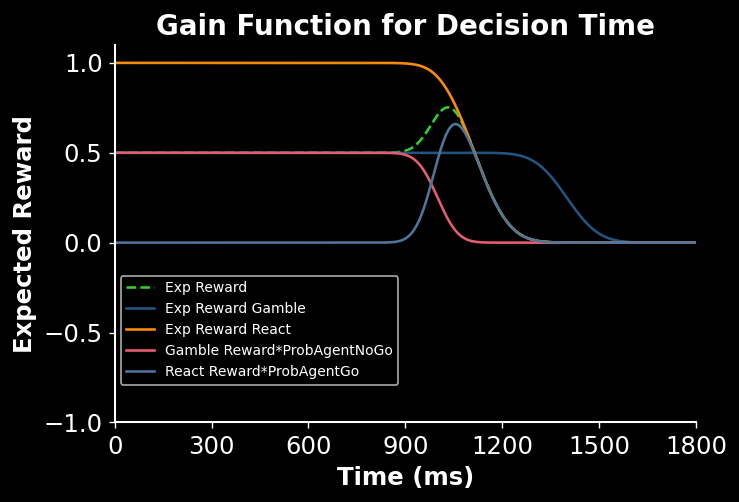

Optimal Decision Time: 1032
Maximum Expected Reward: 0.7525000159938099
Gamble Target Reach Time: 1131.8018764091703
Reaction Target Reach Time: 1417.4710019790136


In [272]:
agent_mean = 1000
agent_std = 50
reaction_time = np.mean(player_reaction_time_mean) - 1*np.mean(player_reaction_time_sd)
movement_time = np.mean(player_task_mean_movement_time) - np.mean(player_reaction_movement_time_sd)
movement_uncertainty = np.mean(player_reaction_movement_time_sd) # NOT reaction+movement time, just the movement time in the reaction control condition
reaction_uncertainty = np.mean(player_reaction_time_sd)
timing_uncertainty = np.mean(coincidence_reach_time_sd) 
plot=True


timesteps = np.arange(0,2000,1)
prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
prob_making_react = np.zeros(len(timesteps))
prob_making_gamble = np.zeros(len(timesteps))
prob_agent_making = np.zeros(len(timesteps))

exp_reward = np.zeros(len(timesteps))
exp_reward_gamble = np.zeros(len(timesteps))
exp_reward_react = np.zeros(len(timesteps))
prob_reward_gamble = np.zeros(len(timesteps))
prob_reward_react = np.zeros(len(timesteps))
prob_reward = np.zeros(len(timesteps))
reaction_movement_time = reaction_time + movement_time


prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
prob_success_react = 1.0
win_reward = 1.0
loss_cost = 0
indecision_cost = 0

prob_agent_go = stats.norm.cdf(timesteps,agent_mean,agent_std)
prob_agent_no_go = 1 - prob_agent_go
prob_agent_making = stats.norm.cdf(1500-timesteps,agent_mean,agent_std)


# Calculate reaction movement uncertainty basedon prob_agent_go
reaction_movement_uncertainty = np.sqrt((movement_uncertainty)**2 + prob_agent_go*(reaction_uncertainty**2)) # We have some uncertainty about making it  
total_uncertainty_reaction = np.sqrt(reaction_movement_uncertainty**2 + timing_uncertainty**2)
total_uncertainty_gamble = np.sqrt(movement_uncertainty**2 + timing_uncertainty**2)  

prob_making_react = stats.norm.cdf(1500-timesteps,reaction_movement_time,total_uncertainty_reaction)
prob_making_gamble = stats.norm.cdf(1500-timesteps,movement_time,total_uncertainty_gamble)

# THESE AREN'T Multiplied by Agent Probability     
prob_reward_gamble = (prob_success_gamble)*prob_making_gamble 
prob_cost_gamble = (1-prob_success_gamble)*prob_making_gamble # Probability of receiving the Cost for being incorrect

prob_reward_react = (prob_success_react)*prob_making_react 
prob_cost_react = ((1-prob_success_react))*prob_making_react # Probability of receiving the Cost for being incorrect

prob_indecision_gamble = (1 - prob_making_gamble)
prob_indecision_react = (1 - prob_making_react)    

# Don't need AND subtraction because the prob_agent_go and prob_agent_no_go takes care of it
# These are multiplied by agent probability, because that's the probability that I SELECT GAMBLE and SELECT REACTION
prob_reward = prob_reward_gamble*prob_agent_no_go + prob_reward_react*prob_agent_go #- (prob_reward_gamble*prob_reward_react) # NEED TO SUBTRACT THE AND PROBABILITY?... this makes sense... If I go at that time, I at least have 0.5 PLUS the probability that the agent has gone will boost it up
prob_cost = prob_cost_gamble*prob_agent_no_go + prob_cost_react*prob_agent_go # - (prob_cost_react*prob_cost_gamble)
prob_indecision = prob_indecision_gamble*prob_agent_no_go + prob_indecision_react*prob_agent_go #- (prob_indecision_gamble*prob_indecision_react) # Probability of indecision depends on if someone gambles

#prob_indecision = prob_indecision_gamble*(1-B) + prob_indecision_react*B - prob_indecision_gamble*(1-B)*B*prob_indecision_react # Probability of indecision depends on if someone gambles 

exp_reward_gamble = prob_reward_gamble*win_reward + prob_cost_gamble*loss_cost + prob_indecision_gamble*indecision_cost
exp_reward_react = prob_reward_react*win_reward + prob_cost_react*loss_cost + prob_indecision_gamble*indecision_cost
exp_reward = prob_reward*win_reward + prob_cost*loss_cost + (prob_indecision_gamble)*indecision_cost

if plot:
    fig,ax = plt.subplots(dpi = 125)
    ax.plot(timesteps, exp_reward, label = 'Exp Reward', c = wheel.green, ls = '--')
    ax.plot(timesteps, exp_reward_gamble, label = 'Exp Reward Gamble')
    ax.plot(timesteps, exp_reward_react, label = 'Exp Reward React')
    ax.plot(timesteps,prob_reward_gamble*prob_agent_no_go,label='Gamble Reward*ProbAgentNoGo')
    ax.plot(timesteps,prob_reward_react*prob_agent_go,label = 'React Reward*ProbAgentGo')
    # ax.plot(timesteps, prob_indecision_gamble)
    ax.set_ylim(-1,1.1)
    ax.set_xlim(0,1500)
    ax.set_xticks(np.arange(0,2000,300))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Expected Reward')
    ax.legend(fontsize = 8,loc = (0.01,0.1))
    ax.set_title(f'Gain Function for Decision Time')#\n B = {B}')
    plt.show()
    optimal_decision_time  = np.argmax(prob_reward) 
    target_reach_time_on_gambles = optimal_decision_time + movement_time 
    target_reach_time_on_reactions = optimal_decision_time + reaction_movement_time
    print(f'Optimal Decision Time: {optimal_decision_time}') # Remember the task decision time is this 
    print(f'Maximum Expected Reward: {np.max(prob_reward)}')
    print(f'Gamble Target Reach Time: {target_reach_time_on_gambles}')
    print(f'Reaction Target Reach Time: {target_reach_time_on_reactions}')
    


In [273]:
import matplotlib 
print(matplotlib.matplotlib_fname())

c:\Users\Seth Sullivan\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


Plot Probability of Agent Decision Time

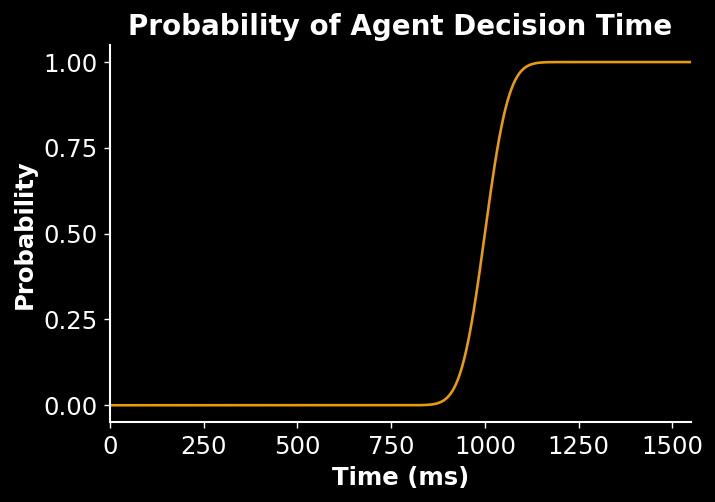

In [314]:
fig,ax = plt.subplots(dpi = 125)
ax.plot(timesteps, prob_agent_go, label = 'Exp Reward', c = wheel.orange, ls = '-')

# ax.plot(timesteps, prob_indecision_gamble)
ax.set_ylim(-0.05, 1.05)
ax.set_xticks(np.arange(0,2000,250))
ax.set_yticks(np.arange(0,1.25,0.25))
ax.set_xlim(0,1550)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.set_title(f'Probability of Agent Decision Time')#\n B = {B}')
plt.show()

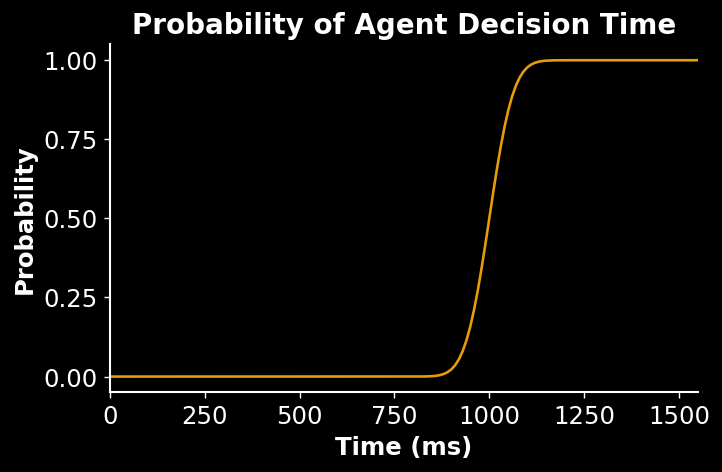

In [298]:
fig, ax = plt.subplots(dpi=125)
xdata, ydata = [], []
ln, = ax.plot([], [], c=wheel.orange)
timesteps_ani = np.arange(0,1800,10)
def init():
    ax.set_xlim(0, 1550)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(np.arange(0,1650,250))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Probability')
    ax.set_title('Probability of Agent Decision Time')
    plt.tight_layout()
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(prob_agent_go[frame])
    ln.set_data(xdata, ydata)
    # if frame 
    return ln,

ani = FuncAnimation(fig, update, frames=timesteps_ani,
                    init_func=init, blit=True)
writergif = animation.PillowWriter(fps=30)
ani.save(SAVE_PATH+'probability_of_agent_decision_time.gif', writer=writergif, dpi=300, savefig_kwargs={'transparent':True})

1 - Prob Agent Decision Time

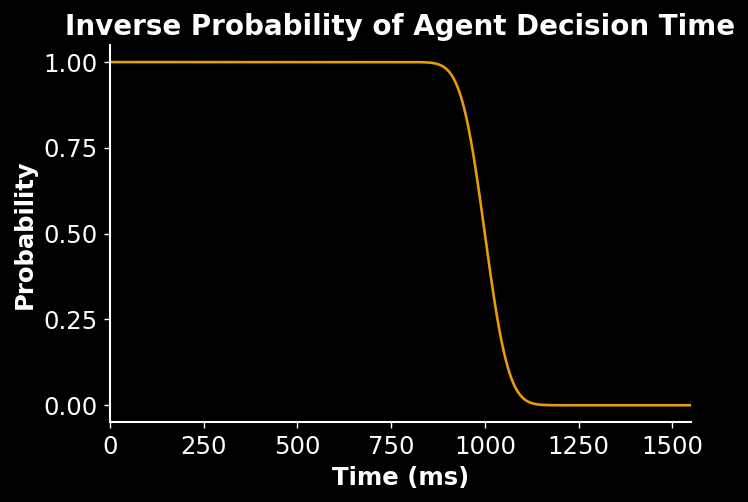

In [313]:
fig,ax = plt.subplots(dpi = 125)
ax.plot(timesteps, prob_agent_no_go, label = 'Exp Reward', c = wheel.orange, ls = '-')

# ax.plot(timesteps, prob_indecision_gamble)
ax.set_ylim(-0.05, 1.05)
ax.set_xticks(np.arange(0,1800,250))
ax.set_yticks(np.arange(0,1.25,0.25))
ax.set_xlim(0,1550)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.set_title(f'Inverse Probability of Agent Decision Time')#\n B = {B}')
plt.show()

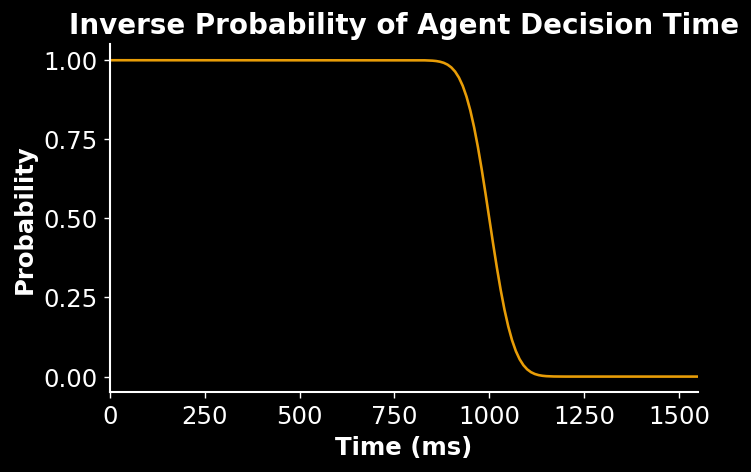

In [294]:
fig, ax = plt.subplots(dpi=125)
xdata, ydata = [], []
ln, = ax.plot([], [], c = wheel.orange)
timesteps_ani = np.arange(0,1800,10)
def init():
    ax.set_xlim(0, 1550)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(np.arange(0,1650,250))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Probability')
    ax.set_title('Inverse Probability of Agent Decision Time')
    plt.tight_layout()
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(1-prob_agent_go[frame])
    ln.set_data(xdata, ydata)
    # if frame 
    return ln,

ani = FuncAnimation(fig, update, frames=timesteps_ani,
                    init_func=init, blit=True, repeat = False)
writergif = animation.PillowWriter(fps=30)
ani.save(SAVE_PATH+'inverse_probability_of_agent_decision_time.gif', writer=writergif, dpi=300, savefig_kwargs={'transparent':True})

Prob Reward Just Reaction 

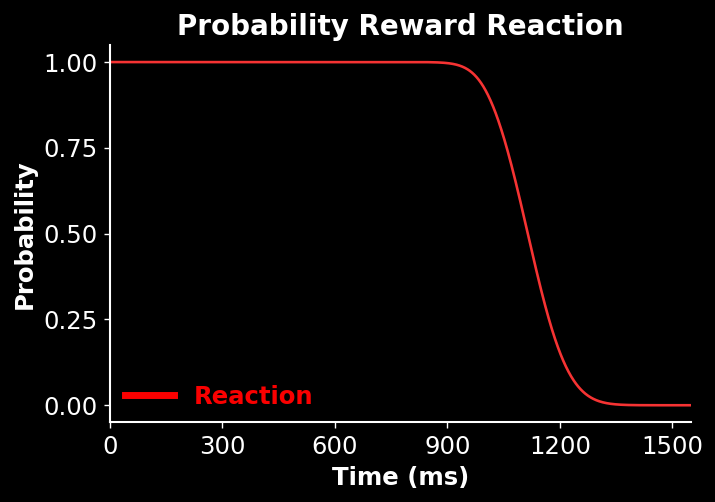

In [312]:
fig,ax = plt.subplots(dpi = 125)
ax.plot(timesteps, exp_reward_react, label = 'Exp Reward', c = wheel.red, ls = '-')

# ax.plot(timesteps, prob_indecision_gamble)
ax.set_ylim(-0.05, 1.05)
ax.set_xlim(0,1550)
ax.set_xticks(np.arange(0,1800,300))
ax.set_yticks(np.arange(0,1.25,0.25))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.set_title(f'Probability Reward Reaction')#\n B = {B}')
dv.Custom_Legend(ax,['Reaction'],[wheel.seth_red],fontsize = 14,loc = [0.01,0.01])    

plt.show()

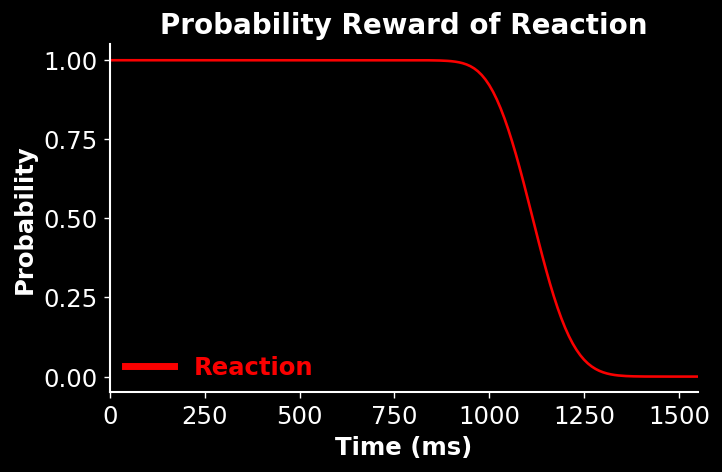

In [276]:
fig, ax = plt.subplots(dpi=125)
xdata, ydata = [], []
ln, = ax.plot([], [], c=wheel.seth_red)
timesteps_ani = np.arange(0,1800,10)
def init():
    ax.set_xlim(0, 1550)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(np.arange(0,1650,250))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Probability')
    ax.set_title('Probability Reward of Reaction')
    plt.tight_layout()
    dv.Custom_Legend(ax,['Reaction'],[wheel.seth_red],fontsize = 14,loc = [0.01,0.01])    

    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(exp_reward_react[frame])
    ln.set_data(xdata, ydata)
    # if frame 
    return ln,

ani = FuncAnimation(fig, update, frames=timesteps_ani,
                    init_func=init, blit=True)
writergif = animation.PillowWriter(fps=30)
ani.save(SAVE_PATH+'probability_reward_reaction.gif', writer=writergif, dpi=300, savefig_kwargs={'transparent':True})

Prob Reward Just Gamble

In [310]:
stats.norm.cdf(-10,movement_time,30)

0.00012607684552386672

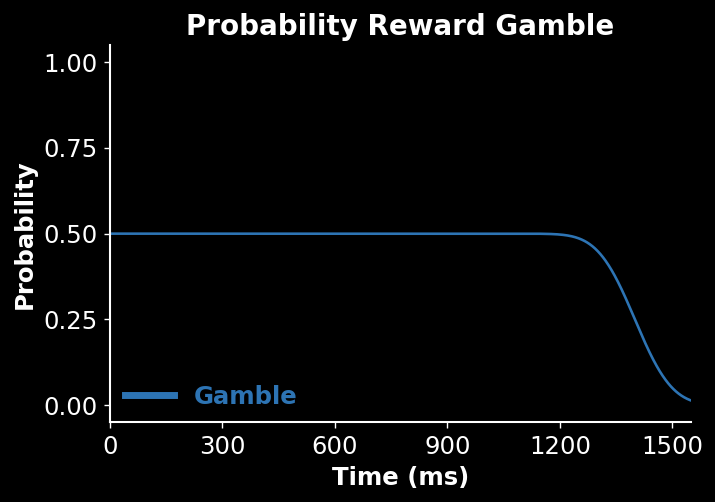

In [311]:
fig,ax = plt.subplots(dpi = 125)
ax.plot(timesteps, exp_reward_gamble, label = 'Exp Reward', c = wheel.seth_blue, ls = '-')

# ax.plot(timesteps, prob_indecision_gamble)
ax.set_ylim(-0.05, 1.05)
ax.set_xlim(0,1550)
ax.set_xticks(np.arange(0,1800,300))
ax.set_yticks(np.arange(0,1.25,0.25))

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.set_title(f'Probability Reward Gamble')#\n B = {B}')
dv.Custom_Legend(ax,['Gamble'],[wheel.seth_blue],fontsize = 14,loc = [0.01,0.01])    

plt.show()

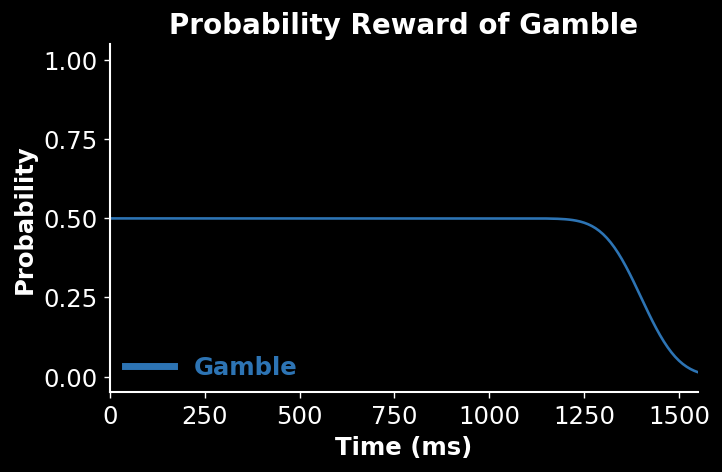

In [277]:
fig, ax = plt.subplots(dpi=125)
xdata, ydata = [], []
ln, = ax.plot([], [], c=wheel.seth_blue)
timesteps_ani = np.arange(0,1800,10)
def init():
    ax.set_xlim(0, 1550)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(np.arange(0,1650,250))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Probability')
    ax.set_title('Probability Reward of Gamble')
    plt.tight_layout()
    dv.Custom_Legend(ax,['Gamble'],[wheel.seth_blue],fontsize = 14,loc = [0.01,0.01])    

    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(exp_reward_gamble[frame])
    ln.set_data(xdata, ydata)
    # if frame 
    return ln,

ani = FuncAnimation(fig, update, frames=timesteps_ani,
                    init_func=init, blit=True)
writergif = animation.PillowWriter(fps=30)
ani.save(SAVE_PATH+'prob_reward_gamble.gif', writer=writergif, dpi=300, savefig_kwargs={'transparent':True})

Prob Reward Both 

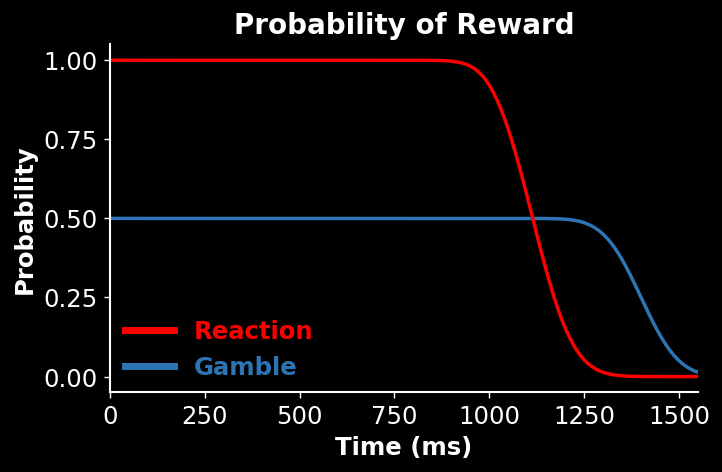

In [278]:
fig, ax = plt.subplots(dpi=125)
x1, y1 = [], []
x2, y2 = [], []
plotlays, plotcols = [2], [wheel.seth_blue,wheel.seth_red]
lines = []
for index in range(2):
    lobj = ax.plot([],[],lw=2,color=plotcols[index])[0]
    lines.append(lobj)
timesteps_ani = np.arange(0,1800,10)

def init():
    ax.set_xlim(0, 1550)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(np.arange(0,1650,250))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Probability')
    ax.set_title('Probability of Reward')
    dv.Custom_Legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize = 14,loc = [0.01,0.01])    
    plt.tight_layout()
    for line in lines:
        line.set_data([],[])
    return lines

def update(frame):
    x1.append(frame)
    y1.append(exp_reward_gamble[frame])
    x2.append(frame)
    y2.append(exp_reward_react[frame])
    xlist = [x1,x2]
    ylist = [y1,y2]
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum],ylist[lnum])
    
    
    # legend = dv.Custom_Legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize = 14)
 
    return lines #+ [legend]

ani = FuncAnimation(fig, update, frames=timesteps_ani,
                    init_func=init, blit=True)
writergif = animation.PillowWriter(fps=30)
ani.save(SAVE_PATH+'prob_of_reward_of_decision.gif', writer=writergif, dpi=300, savefig_kwargs={'transparent':True})


Reaction Convolution 

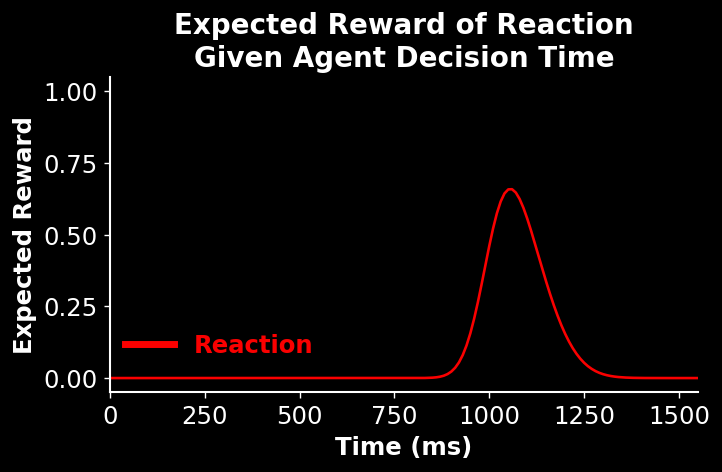

In [279]:
fig, ax = plt.subplots(dpi=125)
xdata, ydata = [], []
ln, = ax.plot([], [], c=wheel.seth_red)
timesteps_ani = np.arange(0,1800,10)
def init():
    ax.set_xlim(0, 1550)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(np.arange(0,1650,250))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Expected Reward')
    ax.set_title('Expected Reward of Reaction\nGiven Agent Decision Time')
    plt.tight_layout()
    dv.Custom_Legend(ax,['Reaction'],[wheel.seth_red],fontsize = 14,loc = [0.01,0.08])    

    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(exp_reward_react[frame]*prob_agent_go[frame])
    ln.set_data(xdata, ydata)
    # if frame 
    return ln,

ani = FuncAnimation(fig, update, frames=timesteps_ani,
                    init_func=init, blit=True)
writergif = animation.PillowWriter(fps=30)
ani.save(SAVE_PATH+'reaction_convolution_with_agent.gif', writer=writergif, dpi=300, savefig_kwargs={'transparent':True})

Gamble Convolution

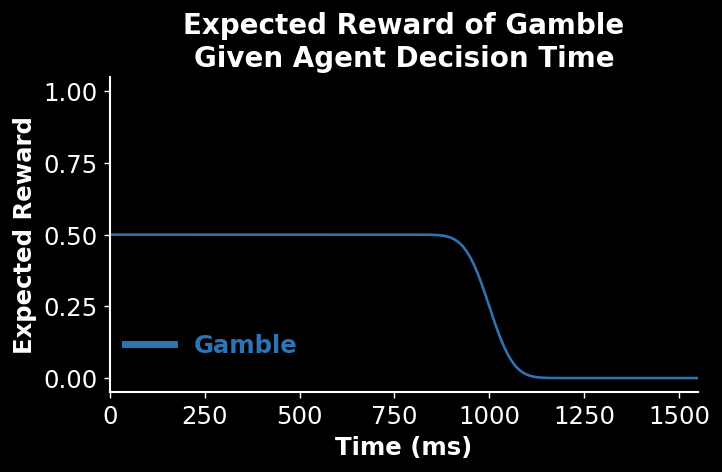

In [280]:
fig, ax = plt.subplots(dpi=125)
xdata, ydata = [], []
ln, = ax.plot([], [], c=wheel.seth_blue)
timesteps_ani = np.arange(0,1800,10)
def init():
    ax.set_xlim(0, 1550)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(np.arange(0,1650,250))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Expected Reward')
    ax.set_title('Expected Reward of Gamble\nGiven Agent Decision Time')
    plt.tight_layout()
    dv.Custom_Legend(ax,['Gamble'],[wheel.seth_blue],fontsize = 14,loc = [0.01,0.08])    

    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(exp_reward_gamble[frame]*prob_agent_no_go[frame])
    ln.set_data(xdata, ydata)
    # if frame 
    return ln,

ani = FuncAnimation(fig, update, frames=timesteps_ani,
                    init_func=init, blit=True)
writergif = animation.PillowWriter(fps=30)
ani.save(SAVE_PATH+'gamble_convolution_with_agent.gif', writer=writergif, dpi=300, savefig_kwargs={'transparent':True})

React and Reward Convolution with Agent Same graph

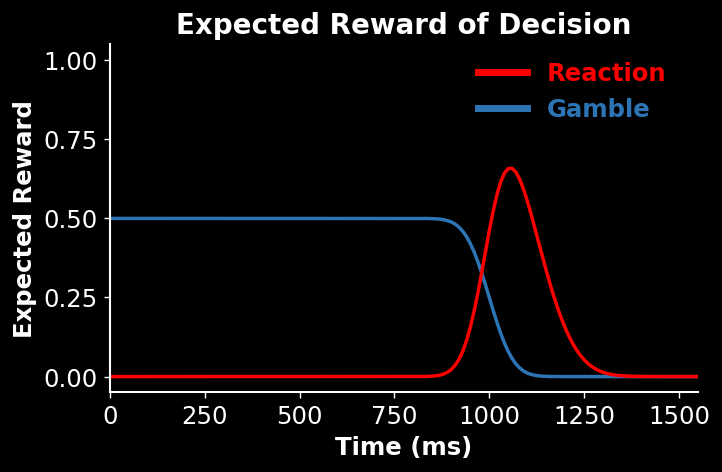

In [281]:
fig, ax = plt.subplots(dpi=125)
x1, y1 = [], []
x2, y2 = [], []
plotlays, plotcols = [2], [wheel.seth_blue,wheel.seth_red]
lines = []
for index in range(2):
    lobj = ax.plot([],[],lw=2,color=plotcols[index])[0]
    lines.append(lobj)
timesteps_ani = np.arange(0,1800,10)

def init():
    ax.set_xlim(0, 1550)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(np.arange(0,1650,250))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Expected Reward')
    ax.set_title('Expected Reward of Decision')
    dv.Custom_Legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize = 14,loc = [0.61,0.751])    
    plt.tight_layout()
    for line in lines:
        line.set_data([],[])
    return lines

def update(frame):
    x1.append(frame)
    y1.append(exp_reward_gamble[frame]*prob_agent_no_go[frame])
    x2.append(frame)
    y2.append(exp_reward_react[frame]*prob_agent_go[frame])
    xlist = [x1,x2]
    ylist = [y1,y2]
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum],ylist[lnum])
    
    # legend = dv.Custom_Legend(ax,['Reaction','Gamble'],[wheel.seth_red,wheel.seth_blue],fontsize = 14)
 
    return lines #+ [legend]

ani = FuncAnimation(fig, update, frames=timesteps_ani,
                    init_func=init, blit=True)
writergif = animation.PillowWriter(fps=30)
ani.save(SAVE_PATH+'both_convolution_with_agent.gif', writer=writergif, dpi=300, savefig_kwargs={'transparent':True})

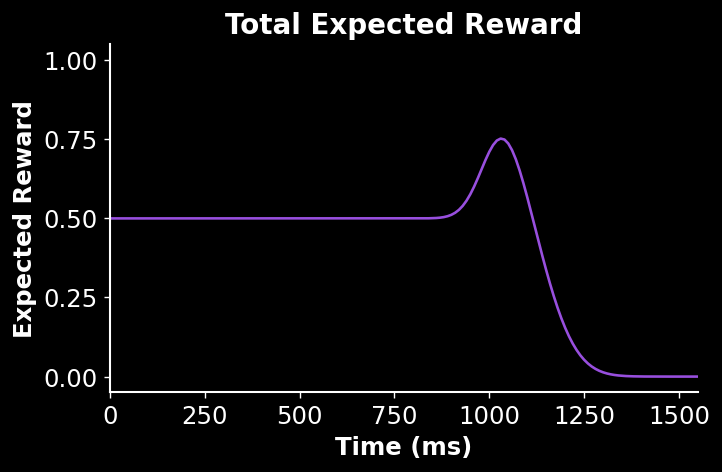

In [302]:
fig, ax = plt.subplots(dpi=125)
xdata, ydata = [], []
ln, = ax.plot([], [], c= wheel.purple)
timesteps_ani = np.arange(0,1800,10)
def init():
    ax.set_xlim(0, 1550)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(np.arange(0,1650,250))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Expected Reward')
    ax.set_title('Total Expected Reward')
    plt.tight_layout()
    
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(exp_reward[frame])
    ln.set_data(xdata, ydata)
    # if frame 
    return ln,

ani = FuncAnimation(fig, update, frames=timesteps_ani,
                    init_func=init, blit=True)
writergif = animation.PillowWriter(fps=30)
ani.save(SAVE_PATH+'total_expected_reward.gif', writer=writergif, dpi=300, savefig_kwargs={'transparent':True})